# **Analyze the Influence of Crime Types on the Arrest Rate in Various Areas of Chicago from 2002 to 2023**

# Project 1

## 1.1 Introduction

Crime is a complex and multifaceted issue that has significant implications for public safety and community well-being. In general, Crime could be divided into two types, violent and non-violent crime; furthermore, crimes like "Homicide", "Assault", and "Robbery" are considered violent, while crimes like "Theft" and "Property damage" are non-violent. The city of Chicago, like many urban centers, experiences a diverse range of criminal activities. Therefore, Chicago has been grappling with crime-related concerns, and understanding the factors influencing arrest rates can offer valuable insights into effective law enforcement strategies and community safety. This dataset reference is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system and hosted in Google BigQuery, which contains incidents of crime except murders that occurred in the city of Chicago from 2001 to 2024.

This project seeks to analyze the relationship between different crime types and areas of Chicago and the arrest rate from 2002 to 2023. Also, I will explore the influence of some economic factors on different crime types in various regions, contributing to our understanding of the nuanced factors affecting arrest rates in Chicago. Throughout my analysis, I will employ statistical tools, including histograms, box plots, and line charts, to visually represent the relationships between crime types, time, locations, and arrest rates. These visualizations will provide valuable insights into patterns and trends within the dataset.

The outcome of this project is arrest rate and there are three independent variables, crime types, time and location. For the first variable ($X_1$), there are 35 crime types in the dataset. The second variable ($X_2$) is the community area which includes 77 areas where the incident occurred in Chicago. The last variable ($X_3$) is the time from 2002 to 2023. The type of crime in a given area can significantly affect law enforcement strategies, community safety perceptions, and arrest rates. In addition, factors such as socioeconomic conditions, population density, and community policing strategies may contribute to differences in arrest rates across locations. Hence, after this research, I could understand how different crime types and locations relate to arrest rates with the change of time, and so learn more about Chicago's crime dynamics. However, it is essential to acknowledge the limitations inherent in this study, such as potential data constraints and external factors influencing crime dynamics.

## 1.2 Data Cleaning and Loading

Before summarising, I need to clean our original dataset first. In this section, I will drop some columns that are useless to my research, such as 'ICUR', 'Domestic', 'Beat', and 'Ward'. Also, there are some incidents that do not keep detailed records, so we need to clean those data to get a more complete dataset, called 'chicago_crime_clean'. To keep the data clean, we change the data of 'District' and 'Community Area' from float to integer.

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
relative_path = os.path.join('..', 'Data', 'Chicago_Crime.csv')
abs_path = os.path.abspath(relative_path)

# Read the CSV file
chicago_crime = pd.read_csv(abs_path)

In [4]:
chicago_crime.shape

(7983700, 22)

In [5]:
chicago_crime.isnull().any(axis=0)

ID                      False
Case Number             False
Date                    False
Block                   False
IUCR                    False
Primary Type            False
Description             False
Location Description     True
Arrest                  False
Domestic                False
Beat                    False
District                 True
Ward                     True
Community Area           True
FBI Code                False
X Coordinate             True
Y Coordinate             True
Year                    False
Updated On              False
Latitude                 True
Longitude                True
Location                 True
dtype: bool

In this dataset, there are 7983700 rows and 22 columns, for those columns, the community area contains missing data, so I need to drop these data to make accurate observations.

In [4]:
# Drop missing value
chicago_crime_clean = chicago_crime.dropna()
# Drop community area missing value
chicago_crime_clean = chicago_crime_clean[chicago_crime_clean['Community Area'] !=0]
# Drop useless columns
chicago_crime_clean = chicago_crime_clean.drop(['Date','IUCR','Location Description','Domestic','Beat',
                                                'Ward','Block','FBI Code','X Coordinate','Y Coordinate',
                                                'Updated On'], axis=1)

In [10]:
df = chicago_crime_clean.groupby(['Year']).count()
df

,ID,Case Number,Primary Type,Description,Arrest,District,Community Area,Latitude,Longitude,Location
Year,,,,,,,,,,
2001,3888,3888,3888,3888,3888,3888,3888,3888,3888,3888
2002,345021,345021,345021,345021,345021,345021,345021,345021,345021,345021
2003,471988,471988,471988,471988,471988,471988,471988,471988,471988,471988
2004,467124,467124,467124,467124,467124,467124,467124,467124,467124,467124
2005,449876,449876,449876,449876,449876,449876,449876,449876,449876,449876
2006,445501,445501,445501,445501,445501,445501,445501,445501,445501,445501
2007,435542,435542,435542,435542,435542,435542,435542,435542,435542,435542
2008,419648,419648,419648,419648,419648,419648,419648,419648,419648,419648
2009,385760,385760,385760,385760,385760,385760,385760,385760,385760,385760


After dropping missing values we found that the number of incidents in the years 2001 and 2024 is much less than in other years, especially for the year 2024, there are at most two months' data in the dataset. In this research, I will focus on the annual change in arrest rates. Therefore, I am going to delete these two years.

In [5]:
# Drop years 2001 and 2024
chicago_crime_clean = chicago_crime_clean[(chicago_crime_clean['Year'] != 2001) & (chicago_crime_clean['Year'] != 2024)]

In [6]:
# Change 'District' and ' Community Area' data into int
chicago_crime_clean['District'] = chicago_crime_clean['District'].astype(int)
chicago_crime_clean['Community Area'] = chicago_crime_clean['Community Area'].astype(int)
# Drop duplicates to keep unique rows
type_mapping = {'CRIM SEXUAL ASSAULT':'CRIMINAL SEXUAL ASSAULT', 'NON - CRIMINAL':'NON-CRIMINAL'}
chicago_crime_clean['Primary Type'] = chicago_crime_clean['Primary Type'].replace(type_mapping)
chicago_crime_clean = chicago_crime_clean.drop_duplicates()
chicago_crime_clean.head()

,ID,Case Number,Primary Type,Description,Arrest,District,Community Area,Year,Latitude,Longitude,Location
11,12045583,JD226426,THEFT,$500 AND UNDER,False,2,35,2020,41.830482,-87.621752,"(41.830481843, -87.621751752)"
12,12031001,JD209965,BATTERY,SIMPLE,True,9,60,2020,41.836310,-87.639624,"(41.836310224, -87.639624112)"
13,12093529,JD282112,ASSAULT,AGGRAVATED - HANDGUN,True,4,46,2020,41.747610,-87.549179,"(41.747609555, -87.549179329)"
14,12178140,JD381597,BATTERY,SIMPLE,False,7,67,2020,41.774878,-87.671375,"(41.77487752, -87.671374872)"
15,4144897,HL474854,BATTERY,AGGRAVATED: OTHER DANG WEAPON,False,7,68,2005,41.781003,-87.652107,"(41.781002663, -87.652107119)"


In [75]:
chicago_crime_clean.shape

(7268092, 11)

After cleaning data, there are 7,268,092 rows and 11 columns left.

## 1.3 Summary Statistics Tables and Plots

### $X_1$: Crime Types

In [76]:
# Create a pivot table to count the number of 'True' and 'False' in each primary type
crime_arrest = chicago_crime_clean.pivot_table(index='Primary Type', columns='Arrest', aggfunc='size', fill_value=0)
# Rename culumns to clarify
crime_arrest.columns = ['Arrested (False)', 'Arrested (True)']
crime_arrest['Percent_Arrested (True)'] = (crime_arrest['Arrested (True)'] / (crime_arrest['Arrested (False)'] + 
                                                                              crime_arrest['Arrested (True)'])) * 100
crime_arrest = crime_arrest.reset_index()
crime_arrest.describe()

,Arrested (False),Arrested (True),Percent_Arrested (True)
count,3.300000e+01,33.000000,33.000000
mean,1.640142e+05,56231.030303,41.441135
std,3.246437e+05,125913.303927,36.313729
min,3.000000e+00,2.000000,5.653641
25%,1.670000e+02,623.000000,11.912738
50%,6.564000e+03,12790.000000,20.752443
75%,2.508970e+05,54229.000000,72.812999
max,1.374957e+06,668226.000000,99.549286


The statistical table above shows that for all of 33 types of crimes, the highest arrest rate is about 99.6%, and the lowest arrest rate is about 5.7%. Also, the average arrest rate is 41.4% approximately, which means more than half of the suspects are not arrested. I will plot graphs to show each primary type's arrest rates later.

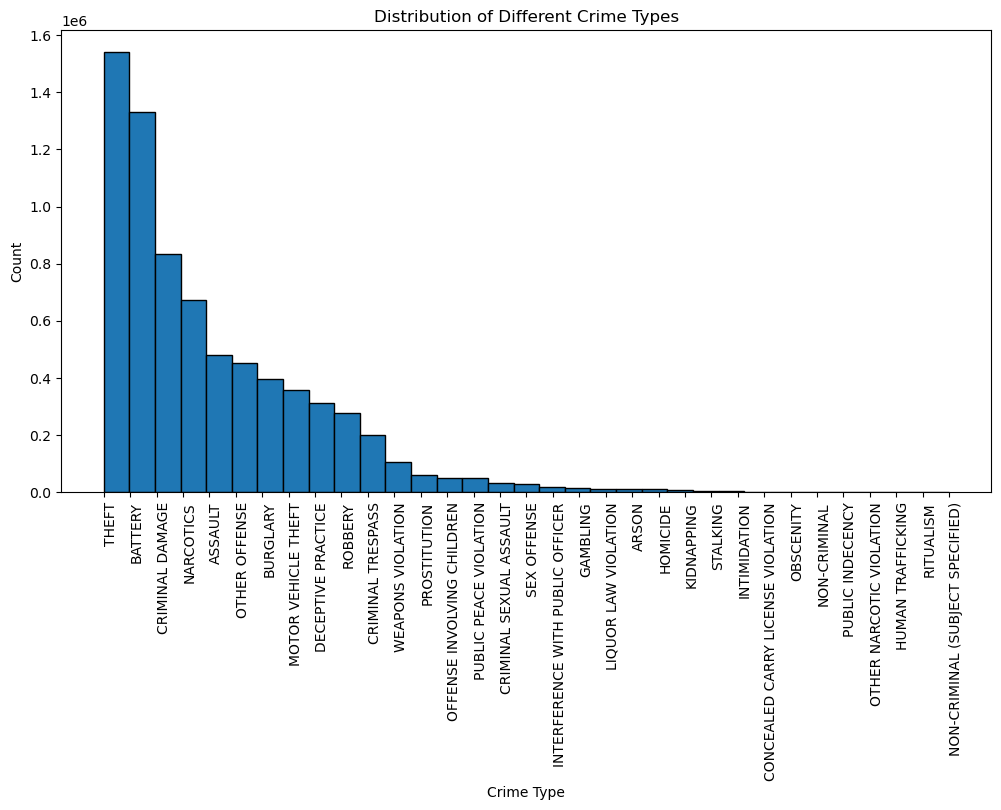

In [77]:
crime_type_counts = chicago_crime_clean['Primary Type'].value_counts()
crime_type_counts_sorted = crime_type_counts.sort_values(ascending = False)
sorted_data = chicago_crime_clean['Primary Type'].map(lambda x: crime_type_counts_sorted.index.get_loc(x))
# Create a histogram
plt.figure(figsize=(12,6))
plt.hist(sorted_data, bins=len(crime_type_counts_sorted), edgecolor='black')
plt.title('Distribution of Different Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='left', ticks=range(len(crime_type_counts_sorted.index)), labels=crime_type_counts_sorted.index)
plt.show()

The histogram is the distribution of crime types' counts, some types having fewer quantities, but I cannot give up any crime types' data since I am going to analyze how crime types influence arrest rates, also these incidents will keep happening in our lives even though the amount that occurs is small. The graph gives us information that the number of crime types of theft and battery is the highest.

In [78]:
crime_arrest.set_index('Primary Type', inplace = True)
print(crime_arrest.loc[crime_arrest['Percent_Arrested (True)'].idxmax()])
print(crime_arrest.loc[crime_arrest['Percent_Arrested (True)'].idxmin()])
print(crime_arrest.describe())

Arrested (False)             277.000000
Arrested (True)            61181.000000
Percent_Arrested (True)       99.549286
Name: PROSTITUTION, dtype: float64
Arrested (False)           373154.000000
Arrested (True)             22361.000000
Percent_Arrested (True)         5.653641
Name: BURGLARY, dtype: float64
       Arrested (False)  Arrested (True)  Percent_Arrested (True)
count      3.300000e+01        33.000000                33.000000
mean       1.640142e+05     56231.030303                41.441135
std        3.246437e+05    125913.303927                36.313729
min        3.000000e+00         2.000000                 5.653641
25%        1.670000e+02       623.000000                11.912738
50%        6.564000e+03     12790.000000                20.752443
75%        2.508970e+05     54229.000000                72.812999
max        1.374957e+06    668226.000000                99.549286


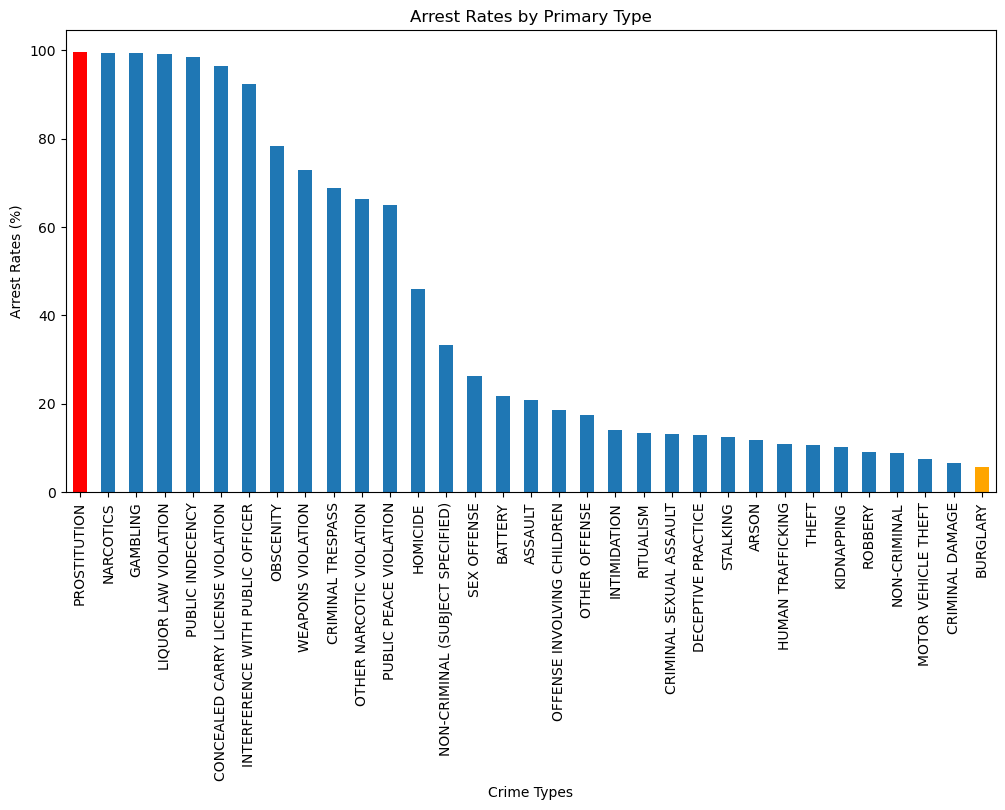

In [79]:
crime_arrest_sorted = crime_arrest.sort_values(by='Percent_Arrested (True)', ascending=False)

ax = crime_arrest_sorted.plot(kind='bar', y='Percent_Arrested (True)', legend=False, figsize=(12, 6))
max_index = crime_arrest_sorted['Percent_Arrested (True)'].idxmax()
min_index = crime_arrest_sorted['Percent_Arrested (True)'].idxmin()
ax.patches[crime_arrest_sorted.index.get_loc(max_index)].set_facecolor('red')
ax.patches[crime_arrest_sorted.index.get_loc(min_index)].set_facecolor('orange')

plt.title('Arrest Rates by Primary Type')
plt.xlabel('Crime Types')
plt.ylabel('Arrest Rates (%)')
plt.xticks(rotation=90)
plt.show()

Now, we can easily see that the crime type of prostitution has the highest arrest rate at about 99.6%, while the type of burglary has the lowest arrest rate at about 5.7%. This bar chart with each crime type on the x-axis and arrest rates on the y-axis, shows that most of the crime types have either high arrest rates greater than 60% or low arrest rates less than 20%. According to the distribution of crime types before, we found that 'theft' and 'battery' are the most frequent occurrences but their arrest rates are not the highest, which describes from the side that it is very difficult to catch this type of criminal. Again, it expresses crime types will influence arrest rates to a certain degree.

### $X_2$: Community Areas of Chicago

In this part, we will focus on how community areas will influence arrest rates without other factors.

In [80]:
# Create a pivot table to count the number of 'True' and 'False' in each community area
area_arrest = chicago_crime_clean.pivot_table(index='Community Area', columns='Arrest', aggfunc='size', fill_value=0)
area_arrest.columns = ['Arrested (False)', 'Arrested (True)']
area_arrest['Percent_Arrested (True)'] = (area_arrest['Arrested (True)'] / (area_arrest['Arrested (False)'] + 
                                                                              area_arrest['Arrested (True)'])) * 100
area_arrest_sorted = area_arrest.sort_values(by='Percent_Arrested (True)', ascending=False)
area_arrest = area_arrest.reset_index()

In [81]:
area_arrest.describe()

,Community Area,Arrested (False),Arrested (True),Percent_Arrested (True)
count,77.000000,77.000000,77.000000,77.000000
mean,39.000000,70291.792208,24099.012987,22.534966
std,22.371857,54214.181844,25795.026325,6.608262
min,1.000000,6387.000000,823.000000,10.383647
25%,20.000000,28961.000000,6857.000000,17.701992
50%,39.000000,53404.000000,14875.000000,22.382251
75%,58.000000,99376.000000,33282.000000,25.630492
max,77.000000,284329.000000,168020.000000,42.966774


In [106]:
area_arrest.set_index('Community Area', inplace = True)
print(area_arrest.loc[area_arrest['Percent_Arrested (True)'].idxmax()])
print(area_arrest.loc[area_arrest['Percent_Arrested (True)'].idxmin()])

Arrested (False)           77811.000000
Arrested (True)            58620.000000
Percent_Arrested (True)       42.966774
Name: 26, dtype: float64
Arrested (False)           12100.000000
Arrested (True)             1402.000000
Percent_Arrested (True)       10.383647
Name: 12, dtype: float64


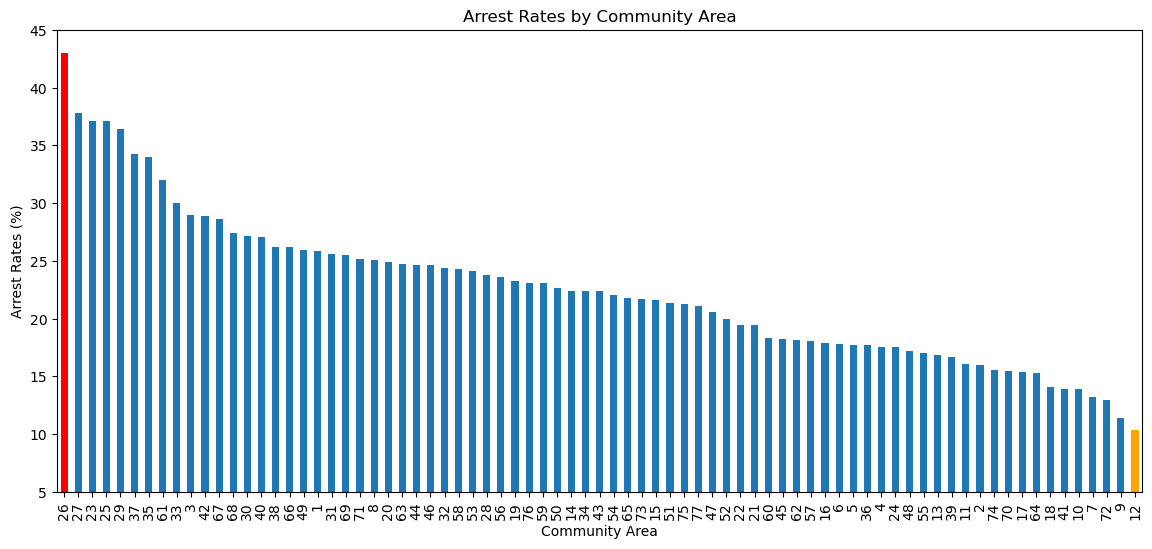

In [83]:
ax2 = area_arrest_sorted.plot(kind='bar', y='Percent_Arrested (True)', legend=False, figsize=(14, 6))
max_index2 = area_arrest_sorted['Percent_Arrested (True)'].idxmax()
min_index2 = area_arrest_sorted['Percent_Arrested (True)'].idxmin()
ax2.patches[area_arrest_sorted.index.get_loc(max_index2)].set_facecolor('red')
ax2.patches[area_arrest_sorted.index.get_loc(min_index2)].set_facecolor('orange')
plt.ylim(5,45)
plt.title('Arrest Rates by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Arrest Rates (%)')
plt.show()

The bar plot above shows each community area with respect to arrest rates. Through observation, we can see that Area 12 has the lowest arrest rate at 10.4%, and Area 26 has the highest arrest rate at 43%. In addition, from the table above, the average arrest rate is about 22.5%, which is less than the arrest rates we have seen before based on the type of crime. We are interested in the root causes of the different arrest rates in different regions, so we might merge another dataset in future projects, like different regional economies.

### $X_3$: Year

In this section, we are going to study changes in arrest rates from year to year.

In [14]:
# Create a pivot table to count the number of 'True' and 'False' in each year
year_arrest = chicago_crime_clean.pivot_table(index='Year', columns='Arrest', aggfunc='size', fill_value=0)
year_arrest.columns = ['Arrested (False)', 'Arrested (True)']
year_arrest['Percent_Arrested (True)'] = (year_arrest['Arrested (True)'] / (year_arrest['Arrested (False)'] + 
                                                                              year_arrest['Arrested (True)'])) * 100
year_arrest_sorted = year_arrest.sort_values(by='Percent_Arrested (True)', ascending=False)
year_arrest = year_arrest.reset_index()

In [85]:
year_arrest.describe()

,Year,Arrested (False),Arrested (True),Percent_Arrested (True)
count,22.000000,22.000000,22.000000,22.000000
mean,2012.500000,246021.272727,84346.545455,24.214572
std,6.493587,50938.203752,39477.788173,6.452209
min,2002.000000,173138.000000,25025.000000,11.569934
25%,2007.250000,207865.000000,52870.750000,19.907587
50%,2012.500000,236506.000000,88518.000000,27.097991
75%,2017.750000,297128.750000,108642.250000,28.793249
max,2023.000000,331541.000000,144248.000000,31.170812


In [15]:
print(year_arrest.loc[year_arrest['Percent_Arrested (True)'].idxmax()])
print(year_arrest.loc[year_arrest['Percent_Arrested (True)'].idxmin()])

Year                         2005.000000
Arrested (False)           309646.000000
Arrested (True)            140230.000000
Percent_Arrested (True)        31.170812
Name: 3, dtype: float64
Year                         2022.000000
Arrested (False)           207166.000000
Arrested (True)             27105.000000
Percent_Arrested (True)        11.569934
Name: 20, dtype: float64


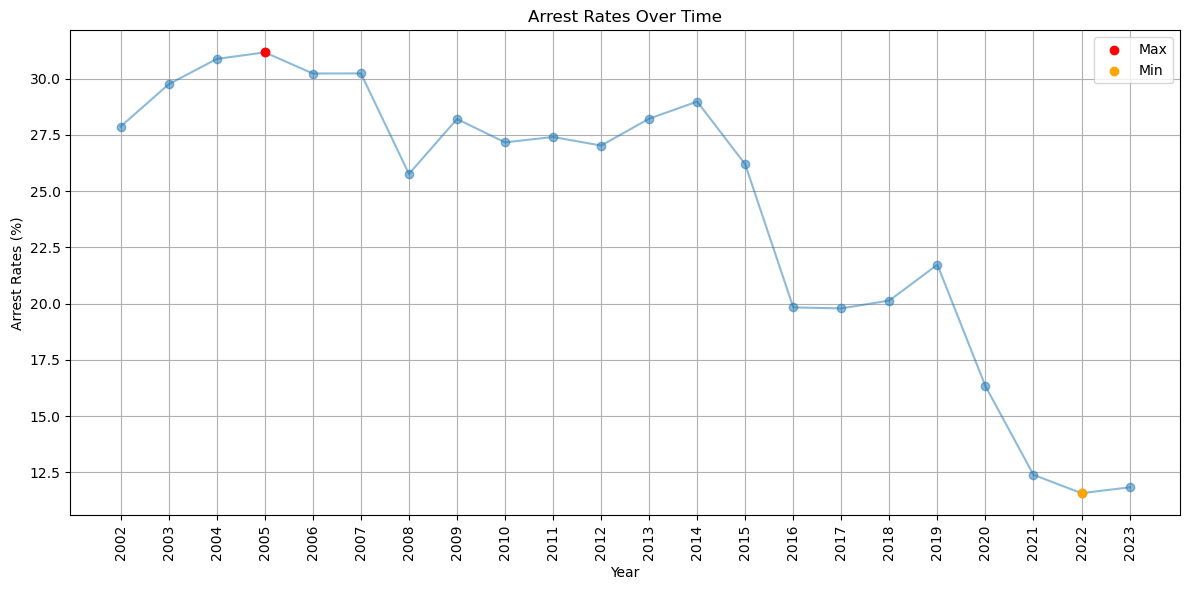

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(year_arrest['Year'], year_arrest['Percent_Arrested (True)'], marker='o', linestyle='-', alpha=0.5, zorder=2)

max_index = year_arrest['Percent_Arrested (True)'].idxmax()
min_index = year_arrest['Percent_Arrested (True)'].idxmin()
plt.scatter(year_arrest['Year'][max_index], year_arrest['Percent_Arrested (True)'][max_index], color='red', label='Max', zorder=3)
plt.scatter(year_arrest['Year'][min_index], year_arrest['Percent_Arrested (True)'][min_index], color='orange', label='Min', zorder=3)

plt.title('Arrest Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Arrest Rates (%)')
plt.grid(True)
plt.xticks(year_arrest['Year'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

The line chart above illustrates the arrest rates from 2002 to 2023. The maximum arrest rate was in 2005, which is 31.2%, and the minimum arrest rate was in 2022 at 11.6%. Moreover, we could see that there is a corner in 2008, and we might guess that is due to the 2008 recession but need more evidence. There are two sharp declines, one was in 2014, and another was in 2019. We should do more research to explain the phenomenon. Also, the statistics summary mentions the average arrest rate is about 24.2%.

### Combine Independent Variables

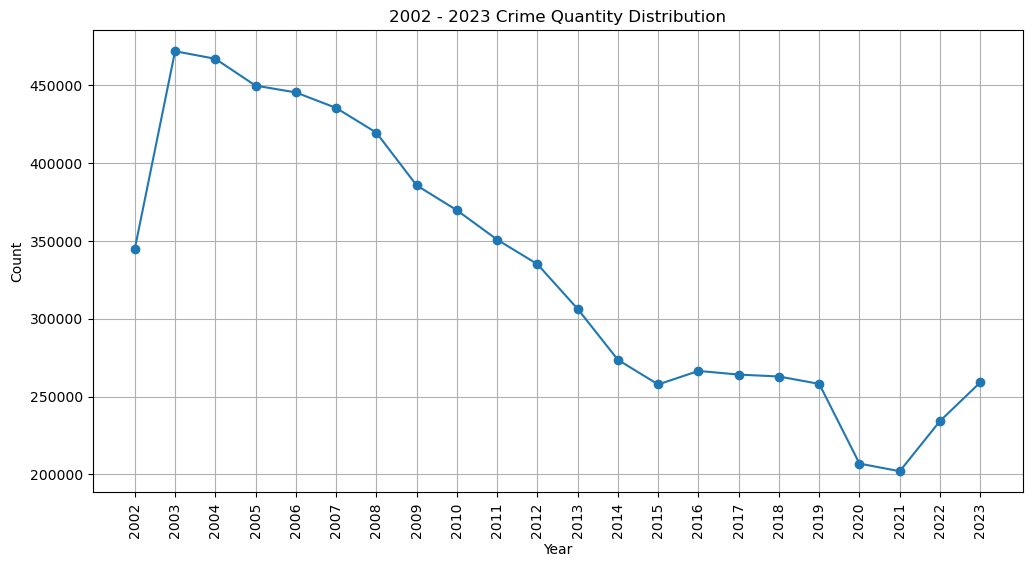

In [73]:
year_counts = chicago_crime_clean['Year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-')
plt.title('2002 - 2023 Crime Quantity Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(year_counts.index, rotation=90)
plt.grid(True)
plt.show()

The line chart above shows the variation in crime quantity from 2002 to 2023. It gives us a surprising result since the number of crimes peaked in 2003 and then continued to decline, reaching its lowest in 2021. We can see that the quantity changes are quite different with the arrest rates changing over time, so we want to explore how each primary type and community area influences arrest rates in each year.

In [10]:
combine = chicago_crime_clean.groupby(['Community Area', 'Primary Type', 'Year']).size().reset_index(name='Count')
# Sort the DataFrame by Year and count
combine_sorted = combine.sort_values(by=['Year', 'Count'], ascending=[True, False])
# Set 'Year' as the index
new = combine_sorted.set_index('Year', inplace=True)
new = combine_sorted.groupby('Year')
print(new.get_group(2005).head())
print(new.get_group(2022).head())

      Community Area Primary Type  Count
Year                                    
2005              25    NARCOTICS   7295
2005              25      BATTERY   5828
2005               8        THEFT   4761
2005              32        THEFT   4479
2005              23    NARCOTICS   4097
      Community Area Primary Type  Count
Year                                    
2022               8        THEFT   4122
2022              32        THEFT   3324
2022              28        THEFT   3295
2022              24        THEFT   2602
2022              25      BATTERY   2378


The table above shows the quantity of the top five crime types in 2005 and 2022 since I want to verify whether crime types will influence arrest rates in community areas. Through observation, I found that the year 2022, which had the lowest arrest rate, had the highest number of thieves; and in 2005 with the highest arrest rate had the most counts of narcotics. Also, the results are totally different from what I found before using a single variable. Therefore, I would guess that the combination of crime types and community areas will influence the arrest rate over time.

In [14]:
most_frequent_type_idx = combine.groupby('Community Area')['Count'].idxmax()
# Create a DataFrame with the most frequent 'Primary Type' for each 'Community Area'
most_frequent_types = combine.loc[most_frequent_type_idx][['Community Area', 'Primary Type', 'Count']]
# Count the number of areas where each crime type occurs the most
area_counts = most_frequent_types.groupby('Primary Type').size().reset_index(name='Area Count')
print(area_counts)

worst_frequent_type_idx = combine.groupby('Community Area')['Count'].idxmin()
# Create a DataFrame with the worst frequent 'Primary Type' for each 'Community Area'
worst_frequent_types = combine.loc[worst_frequent_type_idx][['Community Area', 'Primary Type', 'Count']]
# Count the number of areas where each crime type occurs the worst
area_counts2 = worst_frequent_types.groupby('Primary Type').size().reset_index(name='Area Count')
print(area_counts2)

        Primary Type  Area Count
0            BATTERY          23
1    CRIMINAL DAMAGE           7
2  CRIMINAL TRESPASS           1
3          NARCOTICS           7
4              THEFT          39
                        Primary Type  Area Count
0                              ARSON          51
1  CONCEALED CARRY LICENSE VIOLATION          23
2                           GAMBLING           2
3                           HOMICIDE           1


Here, it represents 5 types of crime that occur the most in each area of Chicago and 4 types of crime that occur the least from 2002 to 2023. We know that in 77 community areas, theft is the most common crime in these areas, which happened the most frequently in 39 areas. Battery is the second-highest crime type in 23 out of 77 areas. On the contrary, there are 51 areas where arson occurs the least in all of the crime types.

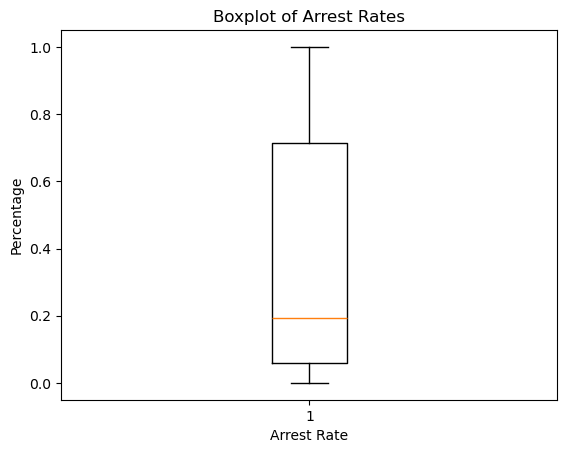

,Arrest
,mean
count,40268.000000
mean,0.364232
std,0.374328
min,0.000000
25%,0.059829
50%,0.193025
75%,0.714286
max,1.000000


In [20]:
new = chicago_crime_clean.groupby(['Community Area', 'Primary Type', 'Year']).agg({'Arrest':['mean']})

# Create a boxplot for arrest rates
plt.boxplot(new)
plt.title('Boxplot of Arrest Rates')
plt.xlabel('Arrest Rate')
plt.ylabel('Percentage')
plt.show()
new.describe()

The boxplot of arrest rates represents the arrest rates based on 33 crime types and 77 community areas. We can see that its min is 0% and max is 100%, but the median rate is only around 19.3% and is a right-skewed plot. According to the box plot, the 25th percentile of the arrest rate is around 6% and the 75th percentile is around 71.4%, which is a huge difference.

# Project 2

## 2.1 The Message

This project aims to answer how different criminal types influence arrest rates. From Project 1, we notice that from 2002 to 2023, the number of crimes is on the decline overall, while there are several inflection points in the arrest rates. Also, from our initial visualization we see prostitution has the highest arrest rates, and burglary is the opposite. To gain a better understanding, we will create figures that show how arrest rates of criminal types change over time.

In [1]:
primary_types = chicago_crime_clean['Primary Type']
num_subplots = 6
primary_types_per_subplot = len(primary_types) // num_subplots

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axs array to easily iterate over the subplots
axs = axs.flatten()

# Plot each primary type
for i in range(num_subplots):
    # Get the start and end index for the current subplot
    start_index = i * primary_types_per_subplot
    end_index = min((i + 1) * primary_types_per_subplot, len(primary_types))
    
    # Iterate over the primary types for the current subplot
    for j, primary_type in enumerate(primary_types[start_index:end_index]):
        # Filter data for the current primary type
        data = chicago_crime_clean[chicago_crime_clean['Primary Type'] == primary_type]
        
        # Group data by year and calculate mean arrest rate for each year
        arrest_rates = data.groupby('Year')['Arrest'].mean()
        
        # Plot the line plot
        axs[i].plot(arrest_rates.index, arrest_rates.values, marker='o', label=primary_type)
        axs[i].set_title(f'Subplot {i+1}')
        axs[i].set_xlabel('Year')
        axs[i].set_ylabel('Arrest Rate')
        axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

NameError: name 'chicago_crime_clean' is not defined

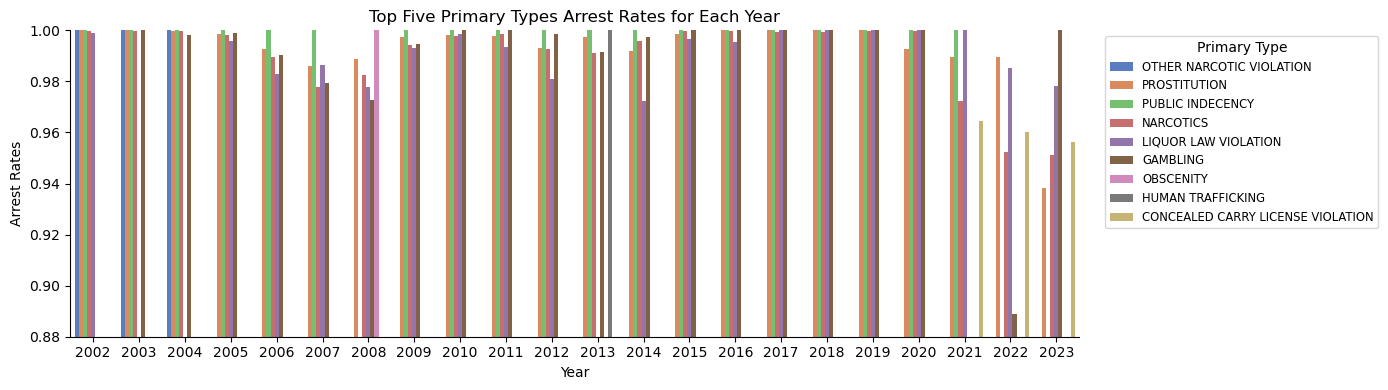

In [77]:
primary_time = chicago_crime_clean.groupby(['Year', 'Primary Type'])['Arrest'].mean().reset_index()
top_five_primary_types = primary_time.groupby('Year').apply(lambda x: x.nlargest(5, 'Arrest')).reset_index(drop=True)

plt.figure(figsize=(14, 4))
ax = sns.barplot(data=top_five_primary_types, x='Year', y='Arrest', hue='Primary Type', palette='muted')

plt.xlabel('Year')
plt.ylabel('Arrest Rates')
plt.title('Top Five Primary Types Arrest Rates for Each Year')
plt.legend(title='Primary Type', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small')
plt.ylim(0.88,1.0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

The graph of the top five primary types arrest rates for each year shows the type of crime with the highest five arrest rates in every year from 2002 to 2023. There are a total of 33 types of crime, but we only select the top five and display them on the graph. This data suggests that other narcotic violation only had high arrest rates from 2002 to 2004, while prostitution and narcotics appear every year. In the rest types, public indecency, liquor law violation, and gambling have higher arrest rates in most of the years. There are several primary types that have unique data, concealed carry license violation only appear since 2021, obscenity only found in 2008, and human trafficking only in 2013; the latter two are the highest arrest rates in their respective years. It seems to show that once a crowd activity is detected and caught, the arrest rate is high. We are now looking at the whole Chicago area's arrest rates of primary types. Further research is needed to identify what factors influence the number of crimes in different community areas thereby further influencing arrest rates.

## Coclusion

In this research, we are trying to analyze whether crime types influence arrest rates in different community areas of Chicago from 2002 to 2023. With our statistical and visual analysis, we see that over time, the number of crimes went down year by year and the arrest rate went down year by year. In addition, from the end analysis, we know that in 39 out of 77 regions, the most frequent type of crime was theft, but with our initial exploration, the number of people who were not arrested for theft was also the highest, even though it does not have the lowest arrest rate. Also, we found that the number of types of crime in an area affects the arrest rate in that area. Area 26 has the highest arrest rate at around 42.967%, while Area 12 only has about 10.384%.

Based on crime types, years, and community areas, the arrest rate has a large range with a minimum of 0% and a maximum of 100%. The average arrest rate is only around 20%, which implies in a significant portion of the data, arrests were made for approximately 20% of reported incidents. This indicates considerable variability in law enforcement outcomes across different crime types, years, and community areas. In conclusion, the data highlights the complexity and diversity of arrest outcomes in the context of crime types, years, and community areas. Therefore, we will keep further analysis and explore how community areas and crime types influence arrest rates over time.